In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  

In [2]:
df_list = glob.glob('../data/behavioral/sub-10*')

In [3]:
#functions that can be used to make columns


#previous trial was a win and marginally larger than the prior that was also a win. apply within choices maintains "stays"

def win_stay(row):
    if (row['point_total'] > (row['prev_points'] + 3)):
        return 1
    else:
        return 0
    
def lose_switch(row):
    if (row['point_total'] < (row['prev_points'] +3)):
        return 1
    else:
        return 0

#previous partner social or nonsocial (computer)

def win_stay_partner_prev_soc(row):
    if (row['win_stay'] == 1 and 
       row['prev_partner'] == 1
       ):
        return 1
    else:
        return 0
    
def win_stay_partner_prev_comp(row):
    if (row['win_stay'] == 1 and
        row['prev_partner'] == 0
        ):
        return 1
    else:
        return 0
    
def lose_switch_partner_prev_soc(row):
    if (row['lose_switch'] == 1 and 
       row['prev_partner'] == 1
        ):
        return 1
    else:
        return 0
    
def lose_switch_partner_prev_comp(row):
    if (row['lose_switch'] == 1 and 
       row['prev_partner'] == 0
       ):
        return 1
    else:
        return 0
    
#current trial social or nonsocial

#win stay
def win_stay_partner_current_soc(row):
    if row['win_stay'] == 1 and row['partner'] == 1:
        return 1
    else:
        return 0

def win_stay_partner_current_comp(row):
    if row['win_stay'] == 1 and row['partner'] == 0:
        return 1
    else:
        return 0

#lose switch
def lose_switch_partner_current_soc(row):
    if row['lose_switch'] == 1 and row['partner'] == 1:
        return 1
    else:
        return 0

def lose_switch_partner_current_comp(row):
    if row['lose_switch'] == 1 and row['partner'] == 0:
        return 1
    else:
        return 0

#affective output of prior     
    
def affective_prior_win(row):
    if row['win_stay'] == 1 and row['prev_affect'] == 1:
        return 1
    else:
        return 0

def affective_prior_loss(row):
    if row['lose_switch'] == 1 and row['prev_affect'] == 0:
        return 1
    else:
        return 0


In [8]:
wins = []
loss = []

win_stay_prev_comp_l = []
win_stay_prev_soc_l = []

win_stay_current_comp_l = []
win_stay_current_soc_l = []

lose_switch_prev_comp_l = []
lose_switch_prev_soc_l = []

lose_switch_current_comp_l = []
lose_switch_current_soc_l = []

for i in df_list[0:1]:
    df = pd.read_csv(i)

    #sets up columns with shift function to allow above functions to run per row
    #df.loc[df['prev_win']] = df['soc_win'].shift()
    #df['earlier_win'] = df['prev_win'].shift()
    
    #shift for deck choice
    df['prev_deckchoice'] = df['deckchoice'].shift()

    #shifts for points
    df['prev_points'] = df['point_total'].shift()
    
    #partner
    df['prev_partner'] = df['partner'].shift()
    
    #prev affect
    df['prev_affect'] = df['soc_win'].shift()    

    #apply functions 
    
    df['win_stay'] = df.apply(win_stay, axis=1)  
    df['lose_switch'] = df.apply(lose_switch, axis=1)
    
    df['win_stay_partner_prev_comp'] = df.apply(win_stay_partner_prev_comp, axis=1)
    df['win_stay_partner_prev_soc'] = df.apply(win_stay_partner_prev_soc, axis=1)
    
    df['win_stay_partner_current_comp'] = df.apply(win_stay_partner_current_comp, axis=1)
    df['win_stay_partner_current_soc'] = df.apply(win_stay_partner_current_soc, axis=1)
    
    df['lose_switch_partner_prev_comp'] = df.apply(lose_switch_partner_prev_comp, axis=1)
    df['lose_switch_partner_prev_soc'] = df.apply(lose_switch_partner_prev_soc, axis=1)
    
    df['lose_switch_partner_current_comp'] = df.apply(lose_switch_partner_current_comp, axis=1)
    df['lose_switch_partner_current_soc'] = df.apply(lose_switch_partner_current_soc, axis=1)
    
    df['affective_prior_win'] = df.apply(affective_prior_win, axis=1)  
    df['affective_prior_loss'] = df.apply(affective_prior_loss, axis=1)
    
    print(df.iloc[:, 2:])
    #all_wins = (df['point_total'] > df['prev_points'] + 3).count()
    #all_loss = (df['point_total'] < df['prev_points'] - 3).count()
    
    #win_stays = (df['win_stay'].sum())
    #lose_switches = (df['lose_switch'].sum())
    
    #win_stay_prev_comp = (df['win_stay_partner_prev_comp'].sum())
    #win_stay_prev_soc = (df['win_stay_partner_prev_soc'].sum())
    
    #win_stay_current_comp = (df['win_stay_partner_current_comp'].sum())
    #win_stay_current_soc = (df['win_stay_partner_current_soc'].sum())
    
    #lose_switch_prev_comp = (df['lose_switch_partner_prev_comp'].sum())
    #lose_switch_prev_soc = (df['lose_switch_partner_prev_soc'].sum())
    
    #lose_switch_current_comp = (df['lose_switch_partner_current_comp'].sum())
    #lose_switch_current_soc = (df['lose_switch_partner_current_soc'].sum())
    
    ##calculate averages
    #win_stay_perc = win_stays / all_wins
    #lose_switch_perc = lose_switches / all_loss

    #win_stay_prev_comp_perc = win_stay_prev_comp / all_wins
    #win_stay_prev_soc_perc = win_stay_prev_soc / all_loss
    
    #win_stay_current_comp_perc = win_stay_current_comp / all_wins
    #win_stay_current_soc_perc = win_stay_current_soc / all_loss
    
    #lose_switch_prev_comp_perc = lose_switch_prev_comp / all_wins
    #lose_switch_prev_soc_perc = lose_switch_prev_soc / all_loss
    
    #lose_switch_current_comp_perc = lose_switch_current_comp / all_wins
    #lose_switch_current_soc_perc = lose_switch_current_soc / all_loss
    
    #add to list
    #wins.append(win_stay_perc)
    #loss.append(lose_switch_perc)

    #win_stay_prev_comp_l.append(win_stay_prev_comp_perc)
    #win_stay_prev_soc_l.append(win_stay_prev_soc_perc)
       
    #win_stay_current_comp_l.append(win_stay_current_comp_perc)
    #win_stay_current_soc_l.append(win_stay_current_soc_perc)
    
    #lose_switch_prev_comp_l.append(lose_switch_prev_comp_perc)
    #lose_switch_prev_soc_l.append(lose_switch_prev_soc_perc)
       
    #lose_switch_current_comp_l.append(lose_switch_current_comp_perc)
    #lose_switch_current_soc_l.append(lose_switch_current_soc_perc)    

    Npoints  lapse1  lapse2  deckchoice       RT1       RT2  choice_onset  \
0        54       0       0           1  1.285837  0.000000      4.816692   
1        53       0       0           1  0.479372  1.339324     22.332338   
2        51       0       0           1  0.454243  1.239091     43.331678   
3        48       0       0           1  0.352794  0.000000     65.331032   
4        30       0       0          22  0.000000  1.532243      0.000000   
..      ...     ...     ...         ...       ...       ...           ...   
75       60       0       0           2  0.000718  0.922049    685.294474   
76        0       0       1           0  0.000713  0.000000    706.293808   
77        0       1       0           0  0.000000  0.000000    725.559918   
78       73       0       0           2  0.000766  1.510709    747.809152   
79       69       0       0           2  0.000723  0.750829    765.808633   

    press1_onset  info_onset  partner_onset  ...  win_stay_partner_prev_com

<BarContainer object of 2 artists>

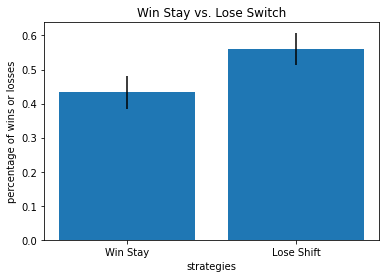

In [29]:
win_stay_mean = np.mean(wins)
loss_switch_mean = np.mean(loss)

win_stay_error = np.std(wins)
loss_switch_error = np.std(loss)

fig = plt.figure()
strategies = ['Win Stay', 'Lose Shift']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.title('Win Stay vs. Lose Switch')
plt.bar(x = strategies, height = [win_stay_mean,loss_switch_mean], yerr = [win_stay_error, loss_switch_error])

<BarContainer object of 2 artists>

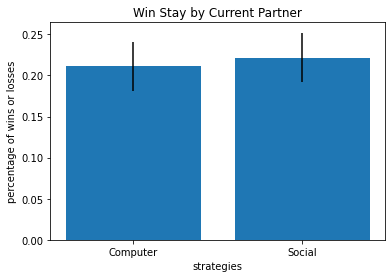

In [30]:
win_stay_current_comp_l_mean = np.mean(win_stay_current_comp_l)
win_stay_current_soc_l_mean = np.mean(win_stay_current_soc_l)

win_stay_current_comp_l_error = np.std(win_stay_current_comp_l)
win_stay_current_soc_l_error = np.std(win_stay_current_soc_l)

fig = plt.figure()
strategies = ['Computer', 'Social']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.title('Win Stay by Current Partner')
plt.bar(x = strategies, height = [win_stay_current_comp_l_mean,win_stay_current_soc_l_mean], yerr = [win_stay_current_comp_l_error, win_stay_current_soc_l_error])

<BarContainer object of 2 artists>

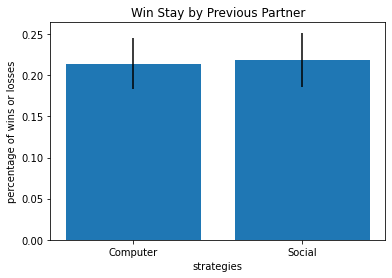

In [31]:
win_stay_prev_comp_l_mean = np.mean(win_stay_prev_comp_l)
win_stay_prev_soc_l_mean = np.mean(win_stay_prev_soc_l)

win_stay_prev_comp_l_error = np.std(win_stay_prev_comp_l)
win_stay_prev_soc_l_error = np.std(win_stay_prev_soc_l)

fig = plt.figure()
strategies = ['Computer', 'Social']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.title('Win Stay by Previous Partner')
plt.bar(x = strategies, height = [win_stay_prev_comp_l_mean,win_stay_prev_soc_l_mean], yerr = [win_stay_prev_comp_l_error, win_stay_prev_soc_l_error])

<BarContainer object of 2 artists>

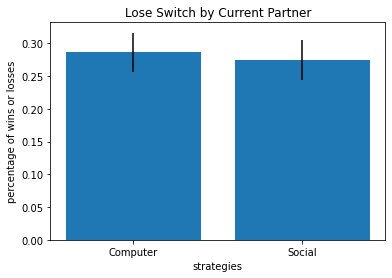

In [25]:
lose_switch_current_comp_l_mean = np.mean(lose_switch_current_comp_l)
lose_switch_current_soc_l_mean = np.mean(lose_switch_current_soc_l)

lose_switch_current_comp_l_error = np.std(lose_switch_current_comp_l)
lose_switch_current_soc_l_error = np.std(lose_switch_current_soc_l)

fig = plt.figure()
strategies = ['Computer', 'Social']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.title('Lose Switch by Current Partner')
plt.bar(x = strategies, height = [lose_switch_current_comp_l_mean,lose_switch_current_soc_l_mean], yerr = [lose_switch_current_comp_l_error, lose_switch_current_soc_l_error])

<BarContainer object of 2 artists>

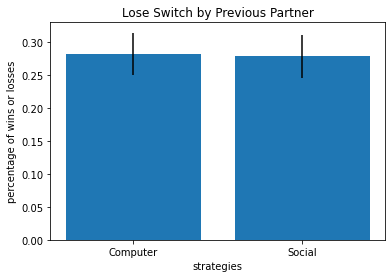

In [32]:
lose_switch_prev_comp_l_mean = np.mean(lose_switch_prev_comp_l)
lose_switch_prev_soc_l_mean = np.mean(lose_switch_prev_soc_l)

lose_switch_prev_comp_l_error = np.std(lose_switch_prev_comp_l)
lose_switch_prev_soc_l_error = np.std(lose_switch_prev_soc_l)

fig = plt.figure()
strategies = ['Computer', 'Social']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.title('Lose Switch by Previous Partner')
plt.bar(x = strategies, height = [lose_switch_prev_comp_l_mean,lose_switch_prev_soc_l_mean], yerr = [lose_switch_prev_comp_l_error, lose_switch_prev_soc_l_error])